In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#  Explanation of Dataset

In [275]:
data = pd.read_csv('songs.csv')

In [276]:
data.shape

(1994, 15)

In [277]:
data.dtypes

Index                      int64
Title                     object
Artist                    object
Top Genre                 object
Year                       int64
Beats Per Minute (BPM)     int64
Energy                     int64
Danceability               int64
Loudness (dB)              int64
Liveness                   int64
Valence                    int64
Length (Duration)          int64
Acousticness               int64
Speechiness                int64
Popularity                 int64
dtype: object

In [278]:
data.describe()

,Index,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.00000
mean,997.500000,1992.992979,120.215647,59.679539,53.238215,-9.008526,19.012036,49.408726,262.443330,28.858074,4.994985,59.52658
std,575.762538,16.116048,28.028096,22.154322,15.351507,3.647876,16.727378,24.858212,93.604387,29.011986,4.401566,14.35160
min,1.000000,1956.000000,37.000000,3.000000,10.000000,-27.000000,2.000000,3.000000,93.000000,0.000000,2.000000,11.00000
25%,499.250000,1979.000000,99.000000,42.000000,43.000000,-11.000000,9.000000,29.000000,212.000000,3.000000,3.000000,49.25000
50%,997.500000,1993.000000,119.000000,61.000000,53.000000,-8.000000,12.000000,47.000000,245.000000,18.000000,4.000000,62.00000
75%,1495.750000,2007.000000,136.000000,78.000000,64.000000,-6.000000,23.000000,69.750000,289.000000,50.000000,5.000000,71.00000
max,1994.000000,2019.000000,206.000000,100.000000,96.000000,-2.000000,99.000000,99.000000,1412.000000,99.000000,55.000000,100.00000


# Visualizing

<IPython.core.display.Javascript object>


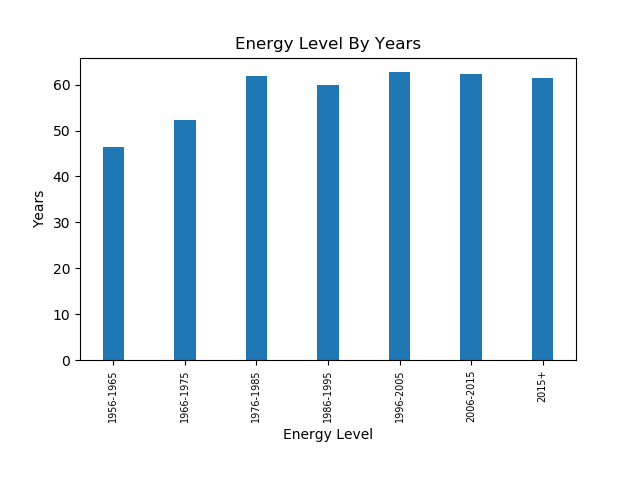

/home/zeynasip/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [279]:
#energy / numerical
plt.figure()

arr = data[['Year', 'Energy']]
bins = [1956, 1966, 1976, 1986, 1996, 2006, 2016, 2019]
labels = ['1956-1965','1966-1975','1976-1985','1986-1995','1996-2005','2006-2015', '2015+']
arr['Year'] = pd.cut(arr['Year'], bins = bins, labels = labels, include_lowest = True)
yearRng = pd.DataFrame({'count': arr.groupby(["Year"]).size()}).reset_index()
energyMean = arr[['Year','Energy']].groupby(['Year'], as_index = False).mean()
energyRng = range(len(energyMean))

x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(90)
energyRng_bar = plt.bar(energyRng, energyMean['Energy'], width = 0.3)    
plt.xticks(energyRng, energyMean['Year'], size = 7)
plt.title("Energy Level By Years")
plt.xlabel('Energy Level')
plt.ylabel('Years')
plt.subplots_adjust(bottom = 0.25) 
plt.show()

<IPython.core.display.Javascript object>


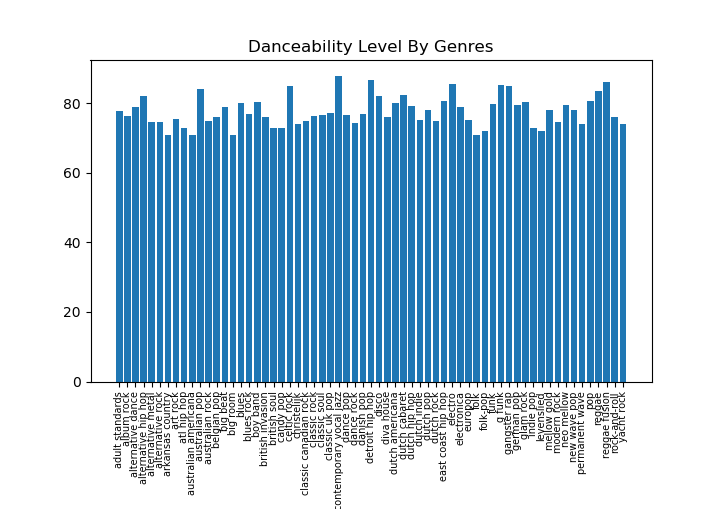

In [199]:
#genres / categorical
plt.figure()

danceCnd = data['Danceability'] > 70  
arr = data[danceCnd][['Top Genre', 'Danceability']]
genres = pd.DataFrame({'count': arr.groupby(["Top Genre"]).size()}).reset_index()
genresMean = arr[['Top Genre','Danceability']].groupby(['Top Genre'], as_index = False).mean()
danceRng = range(len(genresMean))

x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(90)
danceRng_bar = plt.bar(danceRng, genresMean['Danceability'], width = 0.8)    
plt.xticks(danceRng, genresMean['Top Genre'], size = 7)
plt.title("Danceability Level By Genres")
plt.subplots_adjust(bottom = 0.25) 
plt.show()

# Preprocessing

In [200]:
data.isnull().sum()

Index                     0
Title                     0
Artist                    0
Top Genre                 0
Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

In [227]:
dataCnd = data['Year'] > 1989
data = data[dataCnd]
data = data.drop(['Artist', 'Title', 'Year', 'Popularity', 'Index'], axis = 1)
data.shape

(1130, 10)

In [273]:
y_data = pd.DataFrame(data['Top Genre'])
X_data = data.drop(['Top Genre'], axis = 1)
df = pd.DataFrame()

# Clustering

[0 2 0 ... 2 1 0]


<IPython.core.display.Javascript object>


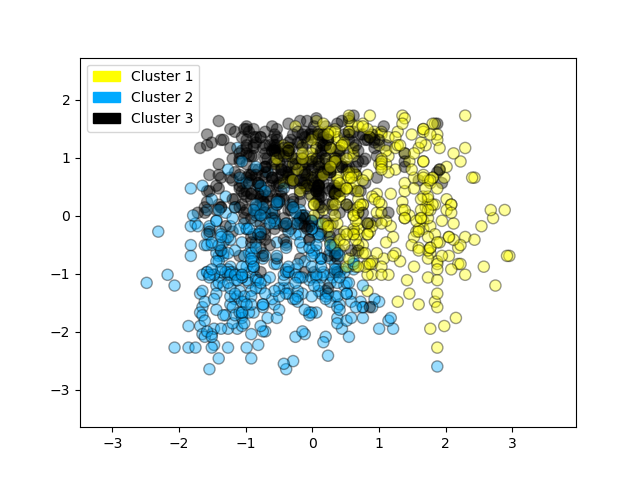

In [266]:
#Partitioning Clustering / k-means
from sklearn.cluster import KMeans 
from adspy_shared_utilities import plot_labelled_scatter

XData = X_data[['Beats Per Minute (BPM)', 'Energy', 'Valence']]
scaler = StandardScaler()
XData = scaler.fit_transform(XData)

kmeans = KMeans(n_clusters = 3, random_state = 41, init = 'k-means++')
kmeans.fit(XData)
y_pred = kmeans.predict(XData)
plot_labelled_scatter(XData, kmeans.labels_, ['Cluster 1', 'Cluster 2', 'Cluster 3'])

<IPython.core.display.Javascript object>


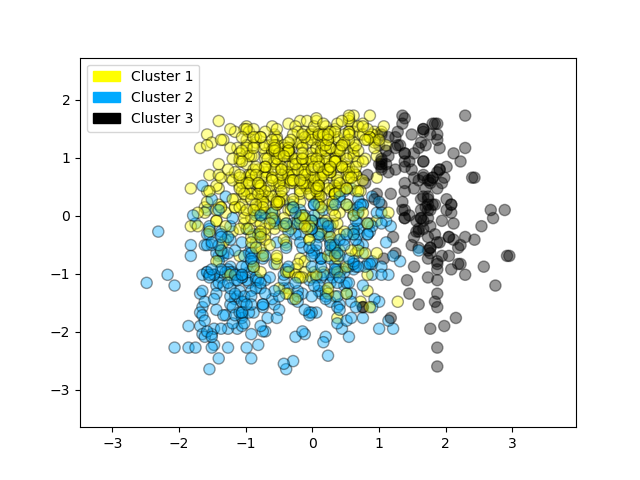

In [280]:
from sklearn.cluster import AgglomerativeClustering

XData = X_data[['Beats Per Minute (BPM)', 'Energy', 'Valence']]
scaler = StandardScaler()
XData = scaler.fit_transform(XData)  

cls = AgglomerativeClustering(n_clusters = 3)
cls_assignment = cls.fit_predict(XData)

plot_labelled_scatter(XData, cls_assignment, ['Cluster 1', 'Cluster 2', 'Cluster 3'])

Cluster membership values:
[-1  0  0 ...  0  0  0]


<IPython.core.display.Javascript object>


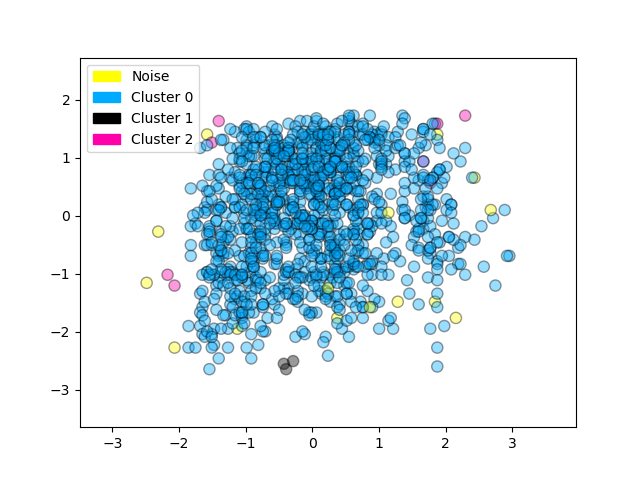

In [281]:
from sklearn.cluster import DBSCAN

XData = X_data[['Beats Per Minute (BPM)', 'Energy', 'Valence']]
scaler = StandardScaler()
XData = scaler.fit_transform(XData)  

dbscan = DBSCAN(eps = 0.5, min_samples = 2)

cls = dbscan.fit_predict(XData)
print("Cluster membership values:\n{}".format(cls))

plot_labelled_scatter(XData, cls + 1, ['Noise', 'Cluster 0', 'Cluster 1', 'Cluster 2'])